## make submissions using weighted rank avg based on the the oof

In [1]:
import sys
from tqdm import tqdm_notebook as tqdm

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# re-load functions
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

## load models

In [3]:
ls ../mnt/blendings/2nd/

e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_oofs.csv
e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_oofs.pkl
e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub.csv.gz
e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub_no_rank.csv
nagiss_01_oof_CV_92065_LB_921.csv
nagiss_01_submission_CV_92065_LB_921.csv
nagiss_02_NN_oof_CV_92118.csv
nagiss_02_NN_submission_CV_92118.csv
oof_0.9237483.csv
oof_ra_x005_lgb_F1200_06.04.2019-10_58_roc0.923686_thr0.7545646.csv
sub_pa_x005_lgb_F1200_06.04.2019-10_58__0.923686_MCC0.599.csv
V600_0.9237483.csv


In [4]:
ls ../mnt/blendings/3rd/

e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_oofs.csv
e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_oofs.pkl
e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_sub_no_rank.csv
e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_sub_rank.csv.gz
exp_3_3_oof_pred.csv
exp_3_3_sub.csv
nagiss_01-2_lgbm_overfit_submission_rankavg_CV_92491_LB_922.csv
nagiss_02-2-2_NN_shuffle_rankavg_submission_CV_92386.csv*
nagiss_02-2_NN_shuffle_oof_CV_92386.csv
nagiss_02-2_NN_shuffle_submission_CV_92386.csv*
oof_0.9236922.csv
oof_0.9237644.csv
oof_0.923911.csv
oof_x030_lgb_F1200_09.04.2019-15.29_auc0.922451.csv
sub_pa_sub_x030_lgb_F1200_09.04.2019-15.29_CV0.922451.csv
sub_ra_sub_x030_lgb_F1200_09.04.2019-15.29_CV0.922451.csv
V400_0.923911_aver_rank.csv
V400_0.923911.csv
V600_0.9236922_aver_rank.csv
V600_0.9236922.csv
V600_0.9237644_aver_rank.csv
V600_0.9237644.csv


In [67]:
ls ../mnt/blendings/3rd/

e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_oofs.csv
e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_oofs.pkl
e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_sub_no_rank.csv
e095_e081_bin_change_10_10_2019-04-09-10-09-32_0.9236_sub_rank.csv.gz
exp_3_3_oof_pred.csv
exp_3_3_sub.csv
nagiss_02-2-2_NN_shuffle_rankavg_submission_CV_92386.csv*
nagiss_02-2_NN_shuffle_oof_CV_92386.csv
nagiss_02-2_NN_shuffle_submission_CV_92386.csv*
oof_0.9236922.csv
oof_0.9237644.csv
oof_0.923911.csv
oof_x030_lgb_F1200_09.04.2019-15.29_auc0.922451.csv
sub_pa_sub_x030_lgb_F1200_09.04.2019-15.29_CV0.922451.csv
sub_ra_sub_x030_lgb_F1200_09.04.2019-15.29_CV0.922451.csv
V400_0.923911_aver_rank.csv
V400_0.923911.csv
V600_0.9236922_aver_rank.csv
V600_0.9236922.csv
V600_0.9237644_aver_rank.csv
V600_0.9237644.csv


In [7]:
ls ../mnt/submissions/

1_9_7_9_9_9_w_naggis_rank.csv
e001_plane_lgbm_2019-03-24-13-51-16_0.88928_sub.csv.gz
e002_plane_lgbm_w_kernel_params_2019-03-24-14-34-39_0.89516_sub.csv.gz
e003_reproduction_of_900_kernel_2019-03-24-17-10-15_0.89842_sub.csv.gz
e004_reproduction_of_900_kernel_w_same_params_2019-03-25-08-03-16_0.89995_sub.csv.gz
e005_e004_wo_colsample_bytree_2019-03-25-08-20-08_0.89826_sub.csv.gz
e006_random_augment_2019-03-25-15-48-22_0.89906_sub.csv.gz
e007_random_augment_raw_features_2019-03-25-18-35-53_0.89906_sub.csv.gz
e007_random_augment_raw_features_2019-03-26-12-50-20_0.89964_sub.csv.gz
e008_random_augment_os_ratio_2019-03-25-16-36-23_0.89604_sub.csv.gz
e009_minus_mode_pow_features_2019-03-27-13-20-44_0.90005_sub.csv.gz
e011_uniq_cnt_encoding_2019-03-29-03-16-09_0.90265_sub.csv.gz
e012_uniq_cnt_encoding_w_meta_2019-03-29-04-27-10_0.90278_sub.csv.gz
e013_e004_w_all_norm_2019-03-29-11-02-40_0.90023_sub.csv.gz
e014_uniq_mask_2019-03-29-11-42-26_0.62286_sub.csv.gz
e015_non_uniq_mask_2019-03-29-12-08

In [8]:
reals = np.load('../mnt/inputs/nes_info/real_samples_indexes.npz.npy')

# guchio best aug
guchio_oof = pd.read_csv('../mnt/blendings/2nd/e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_oofs.csv')
guchio_sub = pd.read_csv('../mnt/blendings/2nd/e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub_no_rank.csv')
guchio_sub_rank = pd.read_csv('../mnt/blendings/2nd/e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub.csv.gz')

# 2nd seed avg
guchio_oof_2 = pd.read_csv('../mnt/oofs/e099_e091_seed_98765_2019-04-10-04-48-31_0.92384_oofs.csv')
guchio_sub_2 = pd.read_csv('../mnt/submissions/e099_e091_seed_98765_2019-04-10-04-48-31_0.92384_sub_no_rank.csv')
guchio_sub_2_rank = pd.read_csv('../mnt/submissions/e099_e091_seed_98765_2019-04-10-04-48-31_0.92384_sub.csv.gz')

# 3rd seed avg
guchio_oof_3 = pd.read_csv('../mnt/oofs/e101_e091_seed_77777_2019-04-10-07-16-36_0.92396_oofs.csv')
guchio_sub_3 = pd.read_csv('../mnt/submissions/e101_e091_seed_77777_2019-04-10-07-16-36_0.92396_sub_no_rank.csv')
guchio_sub_3_rank = pd.read_csv('../mnt/submissions/e101_e091_seed_77777_2019-04-10-07-16-36_0.92396_sub.csv.gz')

In [12]:
def plot_oof_and_sub_hist(ax, oof_series, sub_series, reals):
    plt_sub = sub_series.iloc[reals]
    sns.distplot(oof_series, kde=False, bins=100, ax=ax, color=None, label='oof', norm_hist=True, hist_kws={'alpha': 0.3})
    sns.distplot(plt_sub, kde=False, bins=100, ax=ax, color='red', label='sub', norm_hist=True, hist_kws={'alpha': 0.3})
    # sns.distplot(oof_series, kde=False, bins=100, ax=ax, color=None, label='oof', norm_hist=False, hist_kws={'alpha': 0.3})
    # sns.distplot(plt_sub, kde=False, bins=100, ax=ax, color='red', label='sub', norm_hist=False, hist_kws={'alpha': 0.3})
    ax.set_xlim(0.0, 1.0)

/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


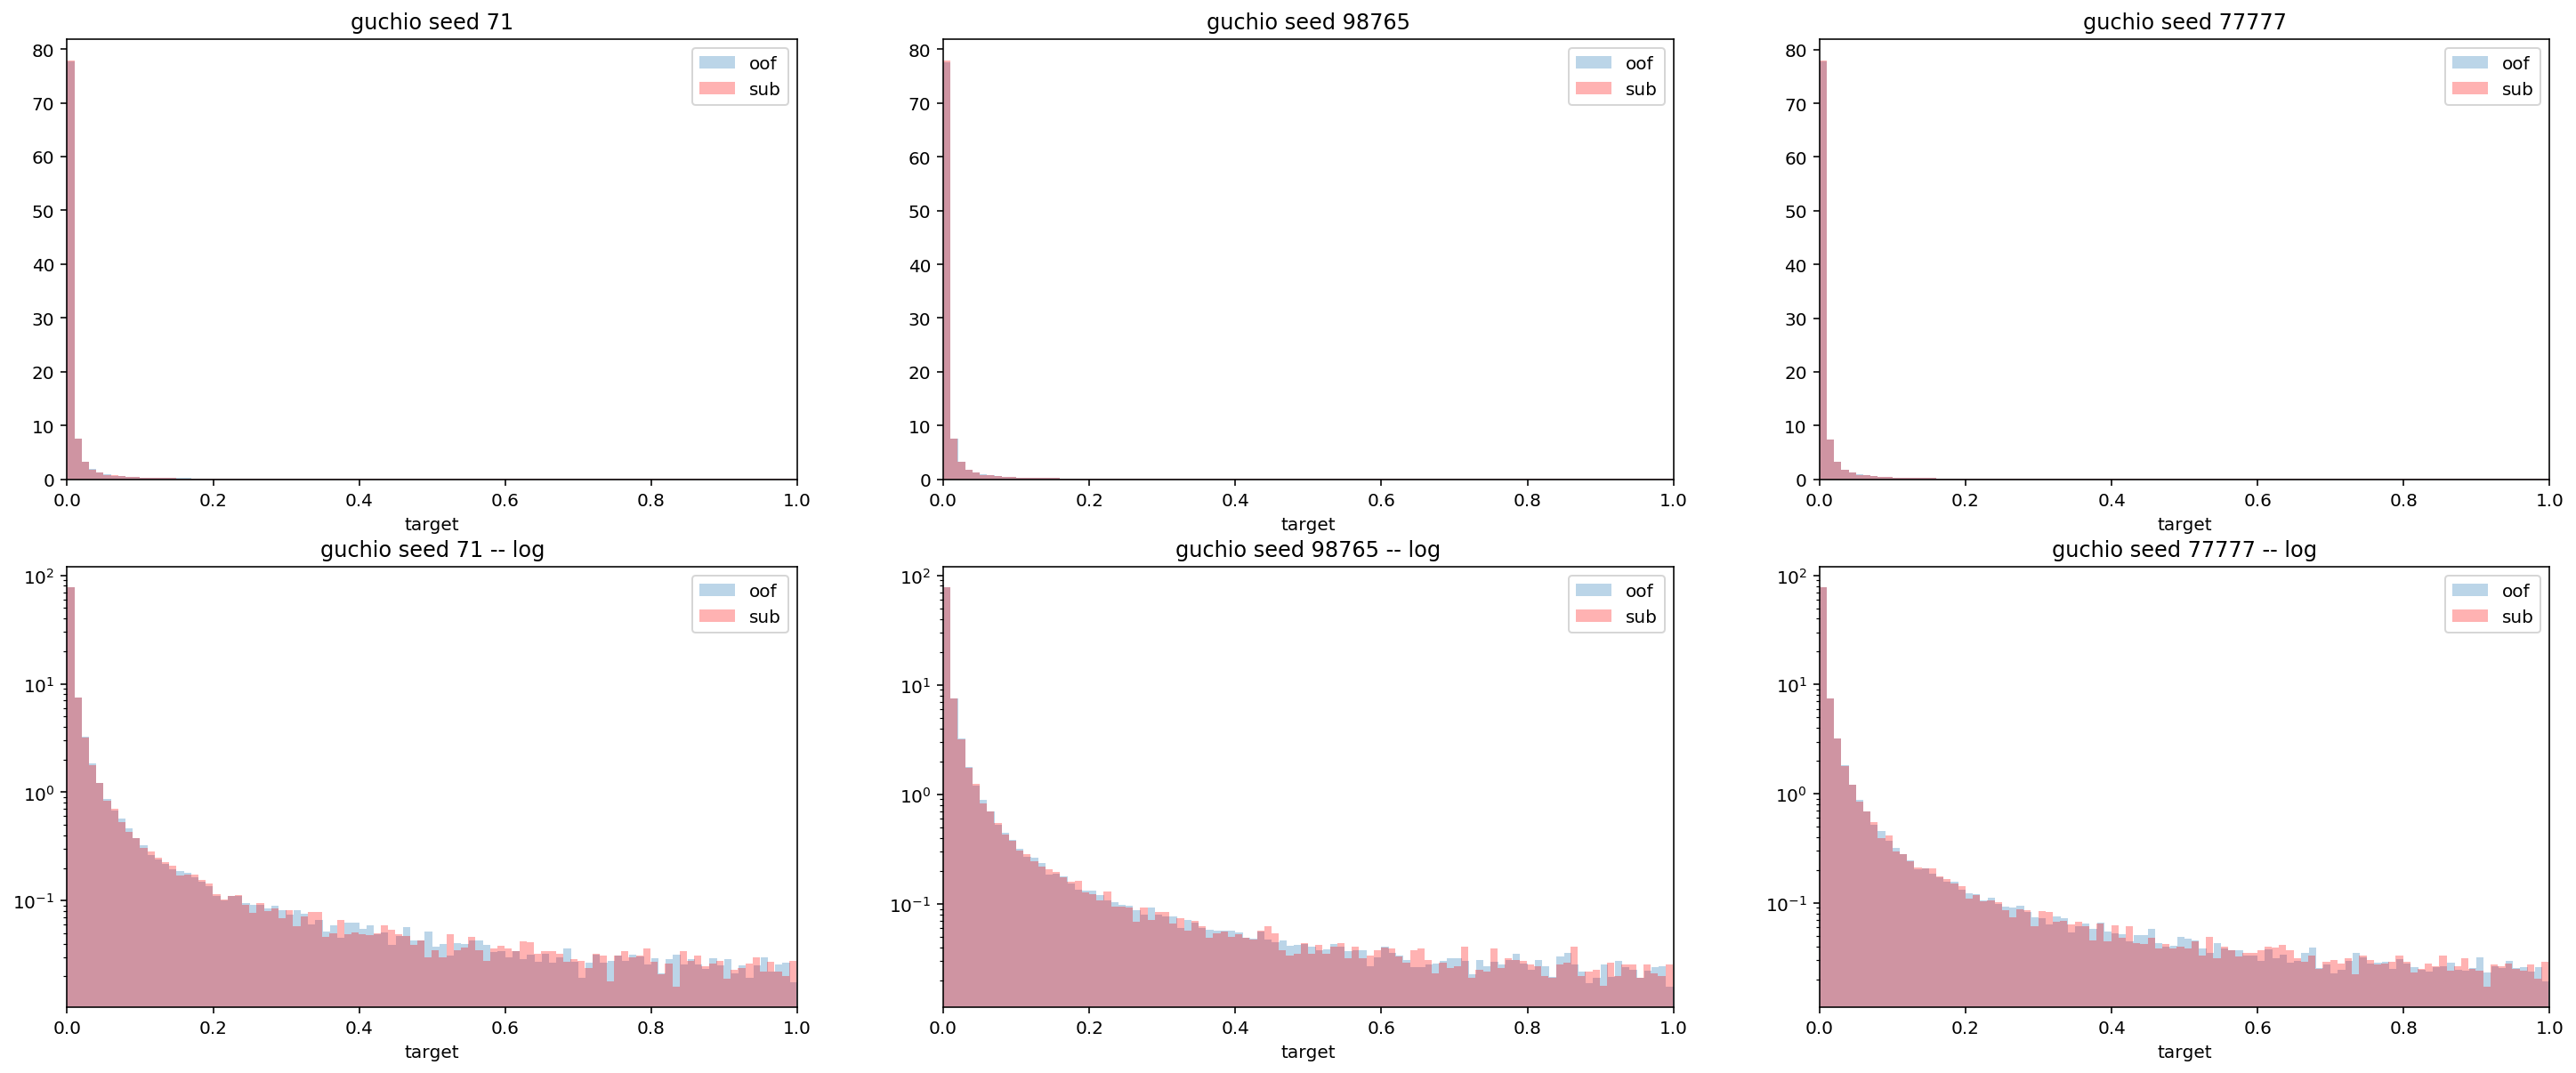

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# nomalscale
# guchio
ax = axs[0, 0]
ax.set_title('guchio seed 71')
plot_oof_and_sub_hist(ax, guchio_oof.oof_proba, guchio_sub.target, reals)
ax.legend()
# nagiss
ax = axs[0, 1]
ax.set_title('guchio seed 98765')
plot_oof_and_sub_hist(ax, guchio_oof_2.oof_proba, guchio_sub_2.target, reals)
ax.legend()
# nagiss
ax = axs[0, 2]
ax.set_title('guchio seed 77777')
plot_oof_and_sub_hist(ax, guchio_oof_3.oof_proba, guchio_sub_3.target, reals)
ax.legend()


## log scale
# guchio
ax = axs[1, 0]
ax.set_yscale('log')
ax.set_title('guchio seed 71 -- log')
plot_oof_and_sub_hist(ax, guchio_oof.oof_proba, guchio_sub.target, reals)
ax.legend()
# nagiss
ax = axs[1, 1]
ax.set_yscale('log')
ax.set_title('guchio seed 98765 -- log')
plot_oof_and_sub_hist(ax, guchio_oof_2.oof_proba, guchio_sub_2.target, reals)
ax.legend()
# nagiss nn 
ax = axs[1, 2]
ax.set_yscale('log')
ax.set_title('guchio seed 77777 -- log')
plot_oof_and_sub_hist(ax, guchio_oof_3.oof_proba, guchio_sub_3.target, reals)
ax.legend()

In [17]:
res = (guchio_sub_rank.iloc[reals].target.rank() + guchio_sub_2_rank.iloc[reals].target.rank() + guchio_sub_3_rank.iloc[reals].target.rank()) / len(reals) / 3

In [18]:
res_df = guchio_sub.copy()
res_df.iloc[reals, 1] = res.values
res_df.head()

,ID_code,target
0,test_0,0.008703
1,test_1,0.024498
2,test_2,0.027850
3,test_3,0.806333
4,test_4,0.008131


In [19]:
res.mean()

0.5000050000000047

In [20]:
res_df.to_csv('../mnt/submissions/guchio_bestLGBM_seed_avg_71_98765_77777.csv.gz', index=False, compression='gzip')

In [22]:
a = pd.concat([guchio_sub_rank.target, guchio_sub_2_rank.target, guchio_sub_3_rank.target], axis=1)
a.columns = ['seed 71', 'seed 98765', 'seed 77777']
a.corr()

,seed 71,seed 98765,seed 77777
seed 71,1.000000,0.999696,0.999689
seed 98765,0.999696,1.000000,0.999687
seed 77777,0.999689,0.999687,1.000000
